# **Microsoft New Movie Studio Insights**



### Business Problem

### Overview


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## 1. Business Understanding


Microsoft wants to create a new movie studio. However, lacking expertise in the film production, the goal is to understand the current successful movie trends and identify successful movie genres driving Box Office performance. The findings will aid in shaping the studio's decisions regarding the genres of movie to produce and ensure alignment with the market demands and audience preferences.

This analysis will answer the following questions:
* Which genres have the highest audience engagement?
* Does duration/runtime of movies have an impact on the viewers rating?
* Can the language in which movies are originally produced affect their popularity and success?
* How do successful films perform in international markets compared to domestic markets?



## 2. Data Understanding


To better understand Box Office performance and movie industry in general, and address Microsoft business problem, we need to collect and analyze data. During this analysis, there are several datasets that will be used. The datasets contains movies information such as genres, runtime minutes, movie budget, gross income, popularity, movie rating, movie titles and release date.

Here are the datasets files that will be needed for analysis:
* `bom.movie_gross.csv`
* `im.db`
* `rt.movie_info.tsv`
* `rt.reviews.tsv`
* `tmbd.movies.csv`
* `tn.movie_budgets.csv`



## 3. Data Preparation


###  Import Necessary Modules for Analysis


In [46]:
#import the module used for working with csv

import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


###  i. Loading the csv files

#### Access the File and Compile Movie Data


In [47]:
# Loading data from CSV files into pandas DataFrames

movies_df = pd.read_csv('tmdb.movies.csv')  # Loading data from 'tmdb.movies.csv' into movies_df
movie_gross_df = pd.read_csv('bom.movie_gross.csv')  # Loading data from 'bom.movie_gross.csv' into movie_gross_df
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')  # Loading data from 'tn.movie_budgets.csv' into movie_budgets_df

#### Checking the Datasets

The project will utilize the above 5 datasets

##### Movies Dataset

In [48]:
#Display information about the structure and content of the movies_df DataFrame
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [49]:
#Retrieve number of rows and columns of the movies_df DataFrame
movies_df.shape

(26517, 10)

In [50]:
# Displaying the first few rows of the movies_df DataFrame
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


##### Movie_Gross Dataset

In [51]:
#Display information about the structure and content of the movie_gross_df DataFrame
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [52]:
# Display the first few rows of the movie_gross_df DataFrame
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Movie Budgets Dataset

In [53]:
# Display information about the structure and content of the movie_budgets_df DataFrame
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [54]:
# Display the first few rows of the movie_budgets_df DataFrame

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [55]:
# Retrieve number of rows and columns of the movie_budgets_df DataFrame

movie_budgets_df.shape

(5782, 6)


### ii. Data Cleaning the csv Files


We'll clean up the tables by fixing any duplicates, missing info, or wrong formats. First, we'll look for missing info in each table and fix it.

Checking for missing info in the `movie_gross_df` table.

In [56]:
#Count the number of missing values in each column of the movie_gross_df DataFrame

movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Checking for missing info in the `movie_df` table.

In [57]:
movies_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Checking for missing info in the `movie_budgets_df` table.

In [58]:
# Count the number of missing values in each column of the movies_df DataFrame

movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Dropping all rows containing missing values in `movie_gross_df`



In [59]:
#define a function to if missing values are present in a dataframe and remove the rows with missing values.    
def remove_NaN_values(df):
    # Check for missing values
    missing_values = df.isna().sum()

    # Remove rows with missing values
    if missing_values.any():
        df.dropna(inplace=True)
        print("Rows with NaN values removed.")
    else:
        print("No NaN values.")
        
        return df


In [60]:
# Apply the function to remove NaN (missing) values in the movie_gross_df DataFrame
remove_NaN_values(movie_gross_df)


Rows with NaN values removed.


##### Formatting columns in `movie_budgets_df` and `movie_gross_df` Dataset

**`production_budget`, `domestic_gross`, and `worldwide_gross`** in the `movie_budgets_df` dataset contain formatting elements like commas(,) and currency symbols ($), which could affect our analysis. We nee to clean the data by converting it to an integer(int) data type for consistency and ease of analysis.

In [61]:
# Display the first few rows of the movie_budgets_df DataFrame for a quick overview

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [62]:
def format_columns(df, column_names):
    for column_name in column_names:
# Remove commas and dollar signs from the specified column
        df[column_name] = df[column_name].str.replace(',', '').str.replace('$', '')

# Convert the column to integer data type
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')

    return df

In [63]:
# Apply the format_columns function to clean and format specific columns in movie_budgets_df
new_movie_budgets = format_columns(movie_budgets_df, ['production_budget', 'domestic_gross', 'worldwide_gross'])

In [64]:
#Display the first few rows to see the changes after cleaning and formatting the columns

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


##### Adding Columns

Add a new column called `overall earnings`. It'll show how much money each movie made overall. This helps us know the net profit that was actually made.

In [65]:
# Create a new column 'overall_earnings' by adding 'domestic_gross' and 'worldwide_gross', handling potential missing values
new_movie_budgets['overall_earnings'] = new_movie_budgets['domestic_gross'].fillna(0) + new_movie_budgets['worldwide_gross'].fillna(0)
new_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_earnings
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0


##### Formatting `movie_gross_df` DataFrame

In [66]:
#first Displaying the first few rows of the movie_gross_df DataFrame
movie_gross_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [69]:
# Convert 'domestic_gross' column to integer type with handling for non-convertible values and NaNs
movie_gross_df['domestic_gross'] = pd.to_numeric(movie_gross_df['domestic_gross'], errors='coerce').astype('Int64')

# Displaying the first few rows of the movie_gross_df DataFrame after conversion
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


#### Filtering Columns 
1. `new_movie_budgets`
2. `movies_gross.df`
3. `movies_df`

**We only require the most significant column for our analysis**

1. `new_movie_budgets`

In [71]:

# List of significant columns to be retained
significant_columns = ['movie', 'production_budget', 'overall_earnings']

# Filtering the relevant columns in new_movie_budgets DataFrame
new_movie_budgets = new_movie_budgets.loc[:, significant_columns]
new_movie_budgets.head()

,movie,production_budget,overall_earnings
0,Avatar,425000000,3536852904
1,Pirates of the Caribbean: On Stranger Tides,410600000,1286727750
2,Dark Phoenix,350000000,192524700
3,Avengers: Age of Ultron,330600000,1862019831
4,Star Wars Ep. VIII: The Last Jedi,317000000,1936903129


2. `movie_gross_df`

In [72]:
# List of significant columns to be retained
significant_columns2 = ['title', 'domestic_gross', 'foreign_gross']

# Filtering the relevant columns in movie_gross_df DataFrame
movie_gross_df = movie_gross_df.loc[:, significant_columns2]

movie_gross_df.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000,652000000
1,Alice in Wonderland (2010),334200000,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000,664300000
3,Inception,292600000,535700000
4,Shrek Forever After,238700000,513900000


3. `movies_df`

In [73]:
# List of significant columns to be retained
significant_columns3 = ['title','original_language','popularity' ]

# Filtering the relevant columns in movie_gross_df DataFrame
movies_df = movies_df.loc[:,significant_columns3]

movies_df.head()

,title,original_language,popularity
0,Harry Potter and the Deathly Hallows: Part 1,en,33.533
1,How to Train Your Dragon,en,28.734
2,Iron Man 2,en,28.515
3,Toy Story,en,28.005
4,Inception,en,27.920


### Loading the Database Tables


The database `im.db` has some datasets that will used for this analysis.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Read a specific table from the database into a pandas DataFrame
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""


# preview the data
pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


We will need `movie_basics` and `movie_ratings` tables for our analysis

Lets Load the Tables

1. `movie_basics`

In [ ]:
q1 = "SELECT * FROM movie_basics"

# Read the table 'movie_basics' into a pandas DataFrame
movie_basics = pd.read_sql_query(q1, conn)

# Show the first few rows of the DataFrame to preview the data
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


2. `movie_ratings`

In [ ]:
q2 = "SELECT * FROM movie_ratings"

# Read the table 'movie_basics' into a pandas DataFrame
movie_ratings = pd.read_sql_query(q2, conn)

# Show the first few rows of the DataFrame to preview the data
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


##### Joining the `movie_basics` table with `movie_ratings` using the primary key that is *`movie_id`***

In [ ]:
q3 = """
    SELECT * 
    FROM movie_basics
    LEFT JOIN movie_ratings USING(movie_id);
"""

# Executing the query and assigning the result to the variable movies_info
merged_movies_info = pd.read_sql(q3, conn)
merged_movies_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [ ]:
merged_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


#### Data Cleaning the Database tables

In [ ]:
#checking if missing values are present

merged_movies_info.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

Dropping all rows containing missing values

In [ ]:
#dropping rows with missing values
merged_movies_info.dropna(inplace = True)

In [ ]:
#checking again for missing values
merged_movies_info.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [ ]:
#filtering columns in movies_info
relevant_columns = ['genres','averagerating','runtime_minutes']
merged_movies_info = merged_movies_info.loc[:,relevant_columns]
merged_movies_info

,genres,averagerating,runtime_minutes
0,"Action,Crime,Drama",7.0,175.0
1,"Biography,Drama",7.2,114.0
2,Drama,6.9,122.0
4,"Comedy,Drama,Fantasy",6.5,80.0
7,"Adventure,Animation,Comedy",8.1,83.0
...,...,...,...
146113,Drama,8.4,130.0
146114,Documentary,6.2,86.0
146115,Documentary,6.2,75.0
146122,"Drama,Family",8.7,98.0


## 4. Exploratory Data Analysis


We will need to analyze data in our tables in order to draw our conclusions and recommendations for Microsoft new movie studio business venture. 

Here are key questions we aim to answer during the analysis:
* Which genres have the highest audience engagement?
* Does duration/runtime of movies have an impact on the viewers rating?
* Can the language in which movies are originally produced affect their popularity and success?
* How do successful films perform in international markets compared to domestic markets?

### 1. Which genres have the highest audience engagement?

In [ ]:
#display the merged_movies_info table
merged_movies_info.head(7)

,genres,averagerating,runtime_minutes
0,"Action,Crime,Drama",7.0,175.0
1,"Biography,Drama",7.2,114.0
2,Drama,6.9,122.0
4,"Comedy,Drama,Fantasy",6.5,80.0
7,"Adventure,Animation,Comedy",8.1,83.0
10,Drama,6.8,136.0
11,History,4.6,100.0


We want to check which types of movies get the best ratings. By comparing different genres, we can find out which ones people like the most. This helps Microsoft know which genres might work well for their new movie studio. We'll show this comparison using a histogram.

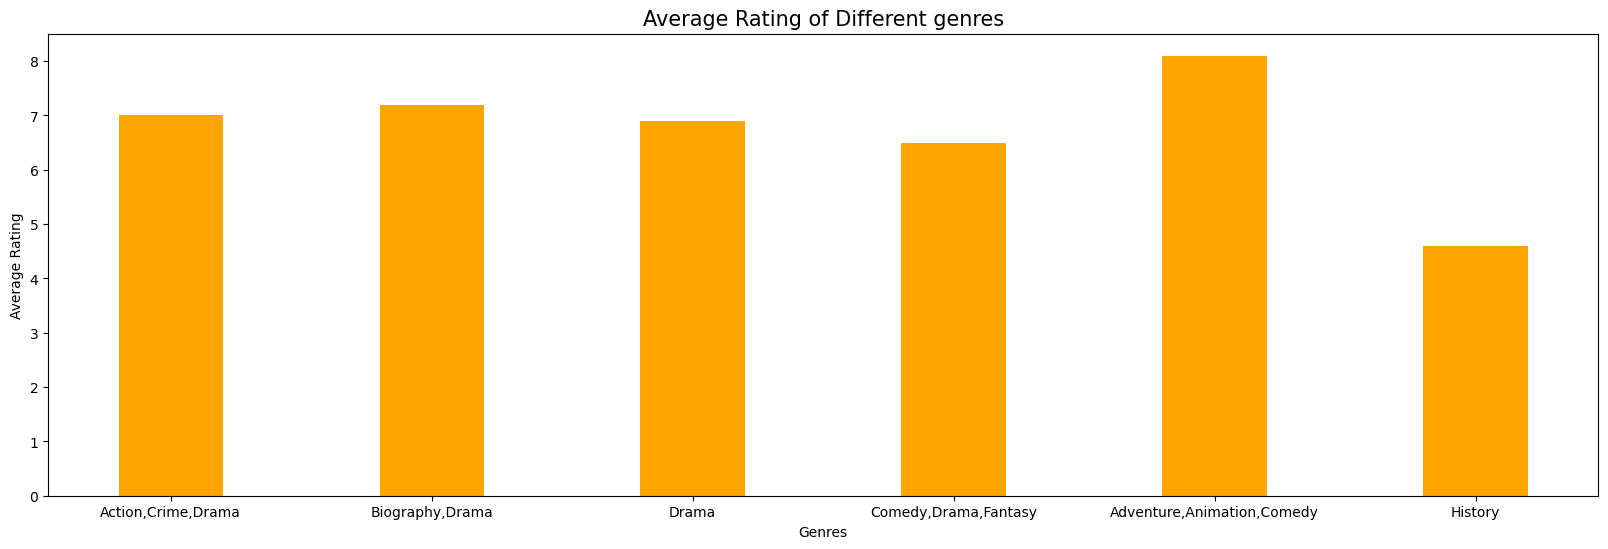

In [ ]:
#plotting a bar graph of genres and average ratings
fig, ax = plt.subplots(figsize = (20,6))

#assigning sample table to data
data = merged_movies_info.head(7)

#declaring variables
x = data['genres']
y = data['averagerating']

#plotting
ax.bar(x,y, color = 'orange', width = 0.4)
       

#labelling axes and title
ax.set_xlabel('Genres', size = 10)
ax.set_ylabel('Average Rating', size = 10)
ax.set_title('Average Rating of Different genres', size = 15)

plt.show()


### 2. Does duration/runtime of movies have an impact on the viewers rating?


Sorting our records from the table from the highest to the smallest runtime_minutes to get our results for the analysis.

In [ ]:
#sorting the table merged_movies_info by runtime_minutes
merged_movies_info.head(10).sort_values(by='runtime_minutes', ascending = False).head(10)

,genres,averagerating,runtime_minutes
12,Documentary,7.6,180.0
0,"Action,Crime,Drama",7.0,175.0
10,Drama,6.8,136.0
2,Drama,6.9,122.0
1,"Biography,Drama",7.2,114.0
11,History,4.6,100.0
13,Drama,6.9,89.0
7,"Adventure,Animation,Comedy",8.1,83.0
4,"Comedy,Drama,Fantasy",6.5,80.0
14,Documentary,7.5,60.0


plot a scatter plot


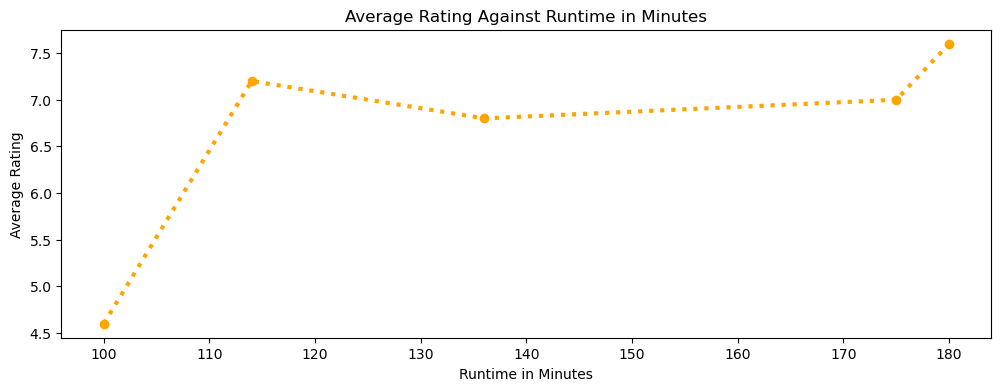

In [ ]:

#plotting a line graph
fig, ax = plt.subplots(figsize = (12,4))

#declaring sorted values to data2
sorted_runtime = merged_movies_info.head(10).sort_values(by='runtime_minutes', ascending = False)
#dropping duplicate genre values
sorted_genres = sorted_runtime.drop_duplicates(subset='genres').head()

#declaring x and y axis
x = sorted_genres['runtime_minutes']
y = sorted_genres['averagerating']

#labelling axis and title
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating Against Runtime in Minutes')

#plotting
ax.plot(x,y, color = 'orange', ls=':', lw = 3, marker = 'o');



### 3. Does a movie's original language affect how popular it becomes?

In [ ]:
#display movies_df table
movies_df.head(10)

,title,original_language,popularity
0,Harry Potter and the Deathly Hallows: Part 1,en,33.533
1,How to Train Your Dragon,en,28.734
2,Iron Man 2,en,28.515
3,Toy Story,en,28.005
4,Inception,en,27.920
5,Percy Jackson & the Olympians: The Lightning T...,en,26.691
6,Avatar,en,26.526
7,Toy Story 3,en,24.445
8,Despicable Me,en,23.673
9,Megamind,en,22.855


In [ ]:
#sorting by popularity
sorting_by_popularity = movies_df.sort_values(by='popularity', ascending = False)
#obtaining only unique original languages
unique_language = sorting_by_popularity.drop_duplicates(subset="original_language")
#previewing first 10 rows
unique_language.head(10)

,title,original_language,popularity
23811,Avengers: Infinity War,en,80.773
20626,Spirited Away,ja,32.043
17402,The Invisible Guest,es,21.087
5191,Sexual Chronicles of a French Family,fr,20.794
23899,Capernaum,ar,20.249
17,LelleBelle,nl,18.586
23915,Operation Red Sea,zh,18.161
20672,In the Fade,de,17.879
23954,Burning,ko,16.152
23991,The 12th Man,no,14.634


### 3. Can the language in which movies are originally produced affect their popularity and success?

plot a bar graph to visualize this

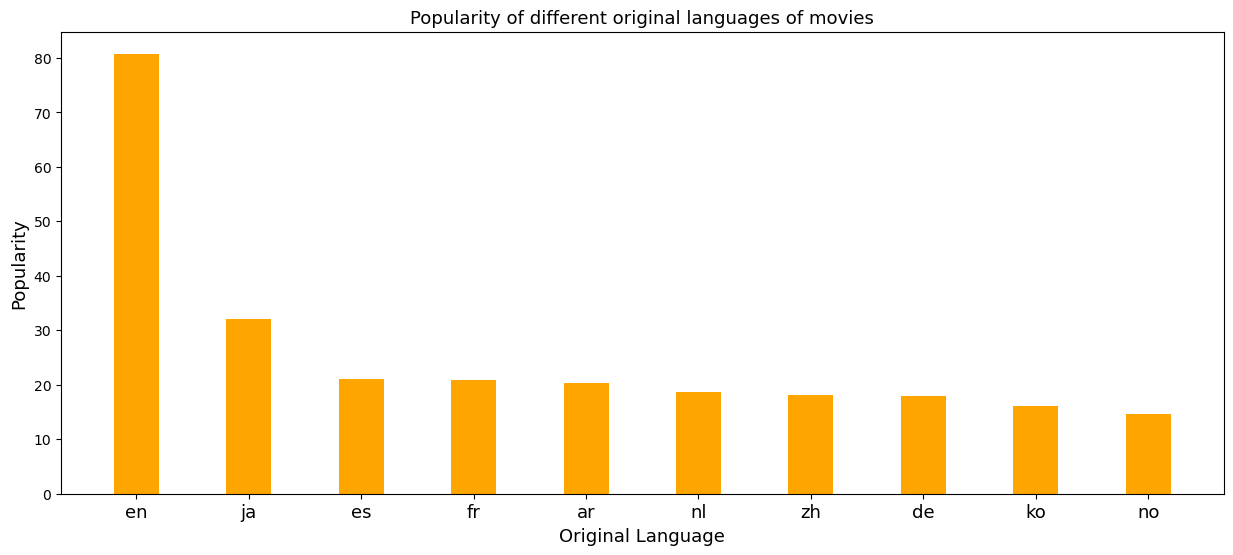

In [ ]:
#sample data
data5 = unique_language.head(10)

#plotting
fig, ax = plt.subplots(figsize = (15,6))

#declaring variables
x = data5['original_language']
y = data5['popularity']

#plotting and labeling axis and titles
ax.bar(x,y, color = 'orange', width = 0.4)
ax.set_xlabel('Original Language', size = 13)
plt.xticks( size = 13)
ax.set_ylabel('Popularity', size = 13)
ax.set_title('Popularity of different original languages of movies', size = 13);

### 4. How do successful films perform in international markets compared to domestic markets?

In [ ]:
movie_gross_df.head(10)

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000,652000000
1,Alice in Wonderland (2010),334200000,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000,664300000
3,Inception,292600000,535700000
4,Shrek Forever After,238700000,513900000
5,The Twilight Saga: Eclipse,300500000,398000000
6,Iron Man 2,312400000,311500000
7,Tangled,200800000,391000000
8,Despicable Me,251500000,291600000
9,How to Train Your Dragon,217600000,277300000


In [ ]:
# Close the database connection
conn.close()

## 5. Conclusion

From the analysis, here are the observations made:

* Adventure, Animation and Comedy genre have a strong preference since it is most prefered by wide range of audience. Based on this analysis this is the top performing genre at Box Office. Movie enthusiasts often find this genre very enjoyable and captivating, making them favored picks among audiences. On the contrary, the least watched genre is History, its performance indicates that its only appealing to few audience.

* Higher average ratings tend to go to movies with longer runtimes, which shows that audiences prefered movies with longer runtimes. Movies with longer runtime provides more content and storytelling. On the contrary movies with shorter runtimes has limited time for storytelling, character development and less content, and this ends up with lower ratings. No one wants a movie with less content and limited storytelling.

* Movies that use English Language tend to reach international audience because most people around the world speak and understand English. In the analysis it shows that English can be easily accessed by most audience include the international audience.

## 6. Recommendation


I would like to recommend the following to Microsoft:

1. Prioritize the Adventure, Animation, and Comedy genres:

Microsoft stands to benefit by focusing on creating films in these genres, as they happen to be the highest performing genres. They have widespread appeal and target a broad audience globally, potentially resulting in higher revenue for Microsoft.

2. Prioritize longer runtimes in movie production:

Longer movies tend to allow for character development, deeper storytelling, and engaging narratives, which lead audiences to give higher ratings. This strategy enhances audience engagement and improves perceptions of film quality, favoring richer content in movies.

3. Prioritize the creation of films in the English language:

Since the English language is widely understood by most audiences, creating films in English allows for resonance with international audiences. This approach can increase potential earnings and elevate global recognition for the film production.